### **Exercise 1**

In this exercise, you will extend a base `Animal` class to create a more specific `Dog` class. This will help you practice inheritance and method overriding in Python.

#### Task:

1. Review the provided `Animal` class.
2. Create a `Dog` class that inherits from `Animal`.
3. Override the `make_sound` method to return "Woof!" instead of the generic animal sound.
4. Add a new method called `fetch` that returns a string saying the dog's name and "fetched the ball!".

Here's the base `Animal` class to start with:

```python
class Animal:
    def __init__(self, name, species):
        self.name = name
        self.species = species
    
    def make_sound(self):
        return "Some generic animal sound"

    def describe(self):
        return f"{self.name} is a {self.species}"
```

Your task is to create the `Dog` class below this `Animal` class definition.

#### Requirements:

- The `Dog` class should inherit from `Animal`.
- The `Dog` class should have its own `__init__` method that calls the parent class's `__init__` method.
- Override the `make_sound` method to return "Woof!".
- Implement a new `fetch` method as described above.

#### Hint:

Remember to use the `super()` function to call methods from the parent class.

In [3]:
class Animal:
    def __init__(self, name, species):
        self.name = name
        self.species = species
    
    def make_sound(self):
        return "Some generic animal sound"

    def describe(self):
        return f"{self.name} is a {self.species}"

class Dog(Animal):  # Dog inherits from Animal
    def __init__(self, name):
        super().__init__(name, species="Dog")  # Call the parent class's __init__
        self.name = name

    def make_sound(self):  # This overrides the method from Animal
        return "Woof!"
    
    def describe(self):
        return f"{super().describe()} and is a good boy"
    
    def fetch(self):
        return f"{self.name} fetched the ball!"
    

my_dog = Dog("Spot")
print(my_dog.describe())  # Output: Canine
print(my_dog.make_sound())  # Output: Woof!
print(my_dog.fetch())

Spot is a Dog and is a good boy
Woof!
Spot fetched the ball!


### **Exercise 2**

In this exercise, you will create a `LogTransform` class that applies a logarithmic transformation to input data. This class should be compatible with scikit-learn's transformer interface and include an inverse transform method.

#### Task:

Create a `LogTransform` class with the following methods:
1. `__init__(self, base=np.e)`: Initialize the transformer with a logarithm base (default to natural log).
2. `fit(self, X, y=None)`: This method should just return self (as log transform doesn't need fitting).
3. `transform(self, X)`: Apply log transformation to the input data.
4. `inverse_transform(self, X)`: Reverse the log transformation.

#### Requirements:

- The class should inherit from `BaseEstimator` and `TransformerMixin` from scikit-learn.
- Handle potential errors, such as non-positive values in the input data.
- Ensure that the `transform` and `inverse_transform` methods work correctly with both 1D and 2D numpy arrays.

#### Hint:

Remember to import necessary modules (numpy, and classes from scikit-learn). Use `np.log` and `np.exp` for the transformations.

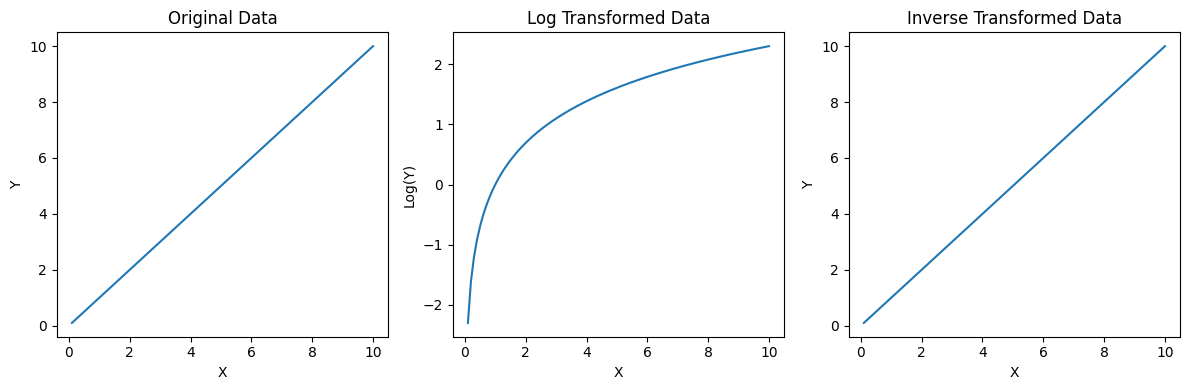

Transformation and inverse transformation verified!


In [20]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

## Implement this class
#TransformerMixin SkLearn - see SkLearn extended guide
class LogTransform(BaseEstimator,TransformerMixin):
    def __init__(self, base=np.e):
        self.base = base

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = np.array(X)
        if np.any(X == 0):
            raise ValueError("Non positive values in sample")
        return np.log(X) / np.log(self.base)
        #putting self in all of these because we're inside a class

    def inverse_transform(self, X):
        #exponent is inverse of log
        return np.power(self.base, X)
       



# Test the implementation
import matplotlib.pyplot as plt

# Create some sample data
X = np.linspace(0.1, 10, 100).reshape(-1, 1)

# Initialize and use the LogTransform
log_transformer = LogTransform(base=np.e)
X_transformed = log_transformer.fit_transform(X)
X_inverse = log_transformer.inverse_transform(X_transformed)

# Plot the results
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(X, X)
plt.title("Original Data")
plt.xlabel("X")
plt.ylabel("Y")

plt.subplot(132)
plt.plot(X, X_transformed)
plt.title("Log Transformed Data")
plt.xlabel("X")
plt.ylabel("Log(Y)")

plt.subplot(133)
plt.plot(X, X_inverse)
plt.title("Inverse Transformed Data")
plt.xlabel("X")
plt.ylabel("Y")

plt.tight_layout()
plt.show()

# Verify that inverse_transform reverses transform
np.testing.assert_allclose(X, X_inverse)
print("Transformation and inverse transformation verified!")

### **Exercise 3**

In this exercise, you will implement a simple gradient descent algorithm to find the minimum of a quadratic function. This will help you understand the core concepts of gradient descent before applying it to linear regression.

#### Task:

1. Implement a function `quadratic(x)` that returns the value of the quadratic function f(x) = x^2 + 2x + 1.
2. Implement a function `quadratic_derivative(x)` that returns the derivative of the quadratic function.
3. Implement a `gradient_descent` function that uses these functions to find the minimum of the quadratic function.
4. Visualize the progress of the gradient descent algorithm.

#### Requirements:

- The `gradient_descent` function should take the following parameters:
  - `start`: The starting point for x
  - `learning_rate`: The step size for each iteration
  - `num_iterations`: The number of iterations to run
  - `tolerance`: Stop if the change in x is smaller than this value
- Plot the quadratic function and show the path taken by gradient descent.
- Print the final minimum point found by the algorithm.

#### Hint:

The derivative of x^2 + 2x + 1 is 2x + 2. The update rule for gradient descent is:
x_new = x_old - learning_rate * derivative(x_old)

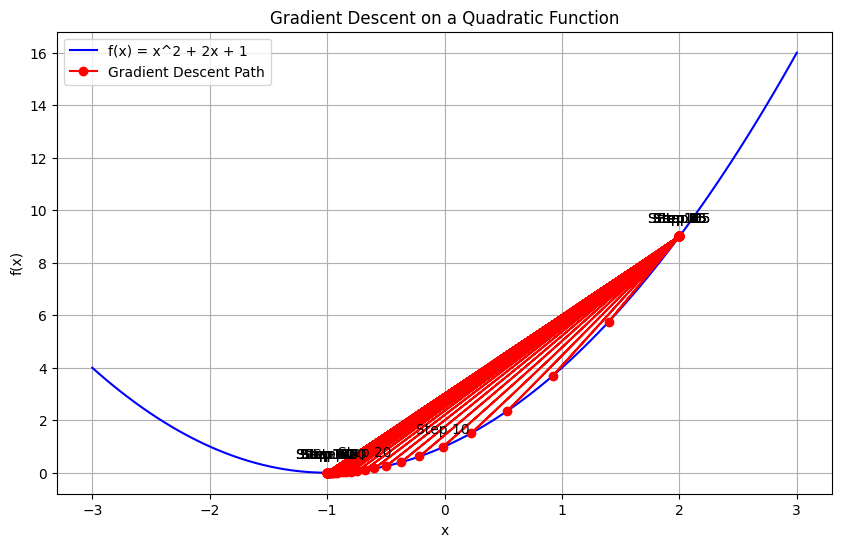

The minimum point found is x = -0.999995
The value of f(x) at this point is 0.000000


In [18]:
import numpy as np
import matplotlib.pyplot as plt

def quadratic(x):
    return x**2 + 2*x + 1
    # implement me

def quadratic_derivative(x):
    return 2*x + 2
    # Implement me

def f(x):
    return x**2 + 5*np.sin(x)

def df(x):
    return 2*x + 5*np.cos(x)

x = np.linspace(-10, 10, 200)
y = f(x)

#plt.figure(figsize=(12, 6))
#plt.plot(x, y)
#plt.title('Optimization Landscape')
#plt.xlabel('x')
#plt.ylabel('f(x)')

def gradient_descent(x_start, learning_rate, num_iterations, tolerance):
# Gradient descent
    x  = x_start
    x_history = [x]


    for _ in range(num_iterations):
        gradient = quadratic_derivative(x)
        new_x = x - learning_rate * gradient
        x_history.append(x_current)
        #trajectory is just a history of all the steps down the gradient

        if abs(new_x - x) < tolerance: 
            break
        #If difference between x and new x is less than tolerance, break
        #Otherwise, keep going

        x = new_x
        x_history.append(x)

    return x, x_history

# Set parameters
x = 2.0
learning_rate = 0.1
num_iterations = 100
tolerance = 1e-6

# Run gradient descent
minimum, x_history = gradient_descent(x_current, learning_rate, num_iterations, tolerance)
#num_iterations is how many times gradient descent run
#error is ypred - ytrue
#trying to minimize cost function here
#tolerance is How close is close enough? (if absolute value of ypred-ytrue is greater than the tolerance, model stops)

# Prepare data for plotting
x = np.linspace(-3, 3, 100)
y = quadratic(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='f(x) = x^2 + 2x + 1')
plt.plot(x_history, [quadratic(x) for x in x_history], 'ro-', label='Gradient Descent Path')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent on a Quadratic Function')
plt.legend()
plt.grid(True)

# Add annotations
for i, (x, y) in enumerate(zip(x_history, [quadratic(x) for x in x_history])):
    if i % 5 == 0:  # Annotate every 5th point to avoid clutter
        plt.annotate(f'Step {i}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

print(f"The minimum point found is x = {minimum:.6f}")
print(f"The value of f(x) at this point is {quadratic(minimum):.6f}")

### **Exercise 4**

In this exercise, you will implement a Simple Linear Regression class that is compatible with scikit-learn's estimator interface. You'll use gradient descent for optimization, as discussed in the lecture notes.

#### Task:

Create a `SimpleLinearRegression` class with the following methods:
1. `__init__(self, learning_rate=0.01, n_iterations=1000, tolerance=1e-6)`: Initialize the model parameters.
2. `fit(self, X, y)`: Fit the model to the training data using gradient descent.
3. `predict(self, X)`: Make predictions using the trained model.
4. `score(self, X, y)`: Calculate the coefficient of determination R^2 of the prediction.

#### Requirements:

- The class should inherit from `BaseEstimator` and `RegressorMixin` from scikit-learn.
- Use gradient descent to optimize the parameters (weight and bias).
- Store the weight as `self.coef_` and the bias as `self.intercept_` (note the trailing underscores).
- Implement early stopping in the `fit` method using the `tolerance` parameter.
- Ensure that the `fit`, `predict`, and `score` methods work with both 1D and 2D numpy arrays for X.

#### Hints:

- Remember to reshape input arrays if necessary to ensure consistent dimensions.
- The gradient descent update rules for simple linear regression are:
  - w = w - learning_rate * (1/n) * sum((y_pred - y) * x)
  - b = b - learning_rate * (1/n) * sum(y_pred - y)
- You can use `np.mean((y_true - y_pred) ** 2)` to calculate MSE for the stopping criterion.

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array

class SimpleLinearRegression(BaseEstimator, RegressorMixin):
    #initialize
    def __init__(self, learning_rate=0.01, n_iterations=1000, tolerance=1e-6)
        
    def fit(self, X, y)
        # Ensure X is a 2D array
        X = np.array(X).reshape(-1, 1) if X.ndim == 1 else np.array(X)

        # Mean of X and y
        X_mean = np.mean(X)
        y_mean = np.mean(y)

        # Calculating the slope (beta)
        self.slope_ = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean)**2)

        # Calculating the intercept (alpha)
        self.intercept_ = y_mean - self.slope_ * X_mean

        return self
    
    def predict(self, X):
        X = np.array(X).reshape(-1, 1) if X.ndim == 1 else np.array(X)
        return self.slope_ * X + self.intercept_
    
    def score(self, X, y):
        # Predict the output using the trained model
        y_pred = self.predict(X)

        # Calculate the mean of the true values (y)
        y_mean = np.mean(y)

        # Total sum of squares (variance of the data)
        total_variance = np.sum((y - y_mean) ** 2)

        # Residual sum of squares (how far predictions are from true values)
        residual_variance = np.sum((y - y_pred) ** 2)

        # Calculate R^2
        r_squared = 1 - (residual_variance / total_variance)
        return r_squared


# Test the implementation
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = SimpleLinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print R-squared score
print(f"R-squared score: {model.score(X_test, y_test):.4f}")

# Plot results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

print(f"Coefficient: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

### **Exercise 5**

In this exercise, you will extend the Simple Linear Regression implementation from Exercise 4 to create a Multiple Linear Regression class. This class will also be compatible with scikit-learn's estimator interface and use gradient descent for optimization.

#### Task:

Create a `MultipleLinearRegression` class with the following methods:
1. `__init__(self, learning_rate=0.01, n_iterations=1000, tolerance=1e-6)`: Initialize the model parameters.
  - the "tolerance" parameter is used as a stopping criterion for the gradient descent algorithm. It helps determine when the algorithm should stop iterating, based on how much the model parameters are changing between iterations.
  - after each iteration in gradient descent, if the absolute value of the change in coefficients is less than tolerance, we can halt the gradient descent process
2. `fit(self, X, y)`: Fit the model to the training data using gradient descent.
3. `predict(self, X)`: Make predictions using the trained model.
4. `score(self, X, y)`: Calculate the coefficient of determination R^2 of the prediction.

#### Requirements:

- The class should inherit from `BaseEstimator` and `RegressorMixin` from scikit-learn.
- Use gradient descent to optimize the parameters (weights and bias).
- Store the weights as `self.coef_` and the bias as `self.intercept_` (note the trailing underscores).
- Implement early stopping in the `fit` method using the `tolerance` parameter.
- Ensure that the `fit`, `predict`, and `score` methods work with 2D numpy arrays for X.
- Handle multiple features in the input data.

#### Hints:

- The implementation will be very similar to the Simple Linear Regression class, but you'll need to handle multiple features.
- The gradient descent update rules for multiple linear regression are:
  - w = w - learning_rate * (1/n) * X.T.dot(y_pred - y)
  - b = b - learning_rate * (1/n) * sum(y_pred - y)
- You can use `np.mean((y_true - y_pred) ** 2)` to calculate MSE for the stopping criterion.

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array

class MultipleLinearRegression:
    # implement me
    pass

# Test the implementation
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = MultipleLinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print R-squared score
print(f"R-squared score: {model.score(X_test, y_test):.4f}")

# Plot results (for the first feature)
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')
plt.xlabel('X (first feature)')
plt.ylabel('y')
plt.title('Multiple Linear Regression')
plt.legend()
plt.show()

print("Coefficients:", model.coef_)
print(f"Intercept: {model.intercept_:.4f}")

# Compare with sklearn's LinearRegression
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression()
sk_model.fit(X_train, y_train)
sk_score = sk_model.score(X_test, y_test)
print(f"sklearn LinearRegression R-squared score: {sk_score:.4f}")

### **Exercise 6**

In this exercise, you will compare the performance of your custom MultipleLinearRegression implementation with sklearn's LinearRegression. You'll examine the coefficients, intercept, and performance metrics while adjusting the learning rate of your custom implementation.

#### Task:

1. Generate a synthetic dataset using sklearn's `make_regression` function.
2. Implement a function to train both your custom MultipleLinearRegression and sklearn's LinearRegression on the same data.
3. Compare the coefficients, intercept, and R-squared scores of both models.
4. Experiment with different learning rates for your custom model and observe how it affects the results.
5. Create a plot showing the R-squared scores of your custom model for different learning rates.

#### Requirements:

- Use the MultipleLinearRegression class you implemented in Exercise 5.
- Test at least 5 different learning rates for your custom model.
- Create a plot comparing the performance (R-squared scores) of your custom model with different learning rates to sklearn's LinearRegression.
- Print a comparison of coefficients and intercepts for the best performing custom model and sklearn's model.

#### Hints:

- You can use `numpy.logspace` to generate a range of learning rates to test.
- Consider using a validation set to select the best learning rate for your custom model.
- Remember to reset your custom model before training with each new learning rate.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming you have your MultipleLinearRegression class from Exercise 5
# from multiple_linear_regression import MultipleLinearRegression

def compare_models(X_train, X_test, y_train, y_test, learning_rates):
    ## Implement me
    pass
    # Should return sk_model, sk_score, custom_scores

# Generate synthetic data
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define learning rates to test
learning_rates = np.logspace(-4, 0, 9)

# Compare models
sk_model, sk_score, custom_scores = compare_models(X_train, X_test, y_train, y_test, learning_rates)

# Plot results
plt.figure(figsize=(10, 6))
plt.semilogx(learning_rates, custom_scores, 'bo-', label='Custom Model')
plt.axhline(y=sk_score, color='r', linestyle='--', label='sklearn Model')
plt.xlabel('Learning Rate')
plt.ylabel('R-squared Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Find best performing custom model
best_lr_index = np.argmax(custom_scores)
best_lr = learning_rates[best_lr_index]
print(f"Best learning rate for custom model: {best_lr:.6f}")

# Train best custom model
best_custom_model = MultipleLinearRegression(learning_rate=best_lr, n_iterations=1000)
best_custom_model.fit(X_train, y_train)

# Compare coefficients and intercepts
print("\nCoefficients comparison:")
print("sklearn Model:", sk_model.coef_)
print("Custom Model:", best_custom_model.coef_)

print("\nIntercept comparison:")
print("sklearn Model:", sk_model.intercept_)
print("Custom Model:", best_custom_model.intercept_)

print("\nR-squared scores:")
print("sklearn Model:", sk_score)
print("Best Custom Model:", custom_scores[best_lr_index])

### **Exercise 7**

In this exercise, you will learn about scikit-learn pipelines and use them to combine your custom LogTransform class from Exercise 2 with your MultipleLinearRegression class from Exercise 5. This will demonstrate how your custom classes can be integrated into the scikit-learn ecosystem.

#### Introduction to Pipelines

Pipelines in scikit-learn are a way to chain multiple steps that can be cross-validated together while setting different parameters. They help in preventing data leakage between train and test sets and make your code cleaner and more modular.

The `make_pipeline` function is a simple way to create a pipeline. It takes a series of estimators and returns a pipeline that chains them in sequence.

#### Task:

1. Create a pipeline that applies the LogTransform to the input features and then uses the MultipleLinearRegression for prediction.
2. Compare the performance of this pipeline with a pipeline using sklearn's StandardScaler and LinearRegression.
3. Use the pipelines on a dataset where a log transformation might be beneficial (e.g., data with exponential relationships in the features).

#### Requirements:

- Use the LogTransform class you implemented in Exercise 2.
- Use the MultipleLinearRegression class you implemented in Exercise 5.
- Create two pipelines using `make_pipeline`:
  a. Custom pipeline: LogTransform -> MultipleLinearRegression
  b. sklearn pipeline: StandardScaler -> LinearRegression
- Generate a synthetic dataset where log transformation of features could be beneficial.
- Compare the R-squared scores of both pipelines.
- Create scatter plots comparing the predictions of both pipelines against the true values.

#### Hints:

- You can use `make_regression` with an exponential transformation on the features to create a dataset where log transformation might be useful.
- Remember to handle any potential issues with non-positive values when applying the log transform.
- Use scikit-learn's `make_pipeline` function to create the pipelines.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming you have your LogTransform and MultipleLinearRegression classes from previous exercises
# from log_transform import LogTransform
# from multiple_linear_regression import MultipleLinearRegression

# Generate synthetic data with exponential relationship in features
n_samples, n_features = 1000, 5
X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=0.1, random_state=42)
X = np.exp(X)  # Apply exponential transformation to create non-linear relationship in features
X = np.abs(X) + 1e-5  # Ensure all values are positive for log transform

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create custom pipeline
custom_pipeline = make_pipeline(
    #implment me
)

# Create sklearn pipeline
sklearn_pipeline = make_pipeline(
    #implment me
)

# Fit both pipelines
custom_pipeline.fit(X_train, y_train)
sklearn_pipeline.fit(X_train, y_train)

# Make predictions
custom_pred = custom_pipeline.predict(X_test)
sklearn_pred = sklearn_pipeline.predict(X_test)

# Calculate R-squared scores
custom_r2 = r2_score(y_test, custom_pred)
sklearn_r2 = r2_score(y_test, sklearn_pred)

print("R-squared scores:")
print(f"Custom Pipeline: {custom_r2:.4f}")
print(f"sklearn Pipeline: {sklearn_r2:.4f}")

# Create scatter plots
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.scatter(y_test, custom_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Custom Pipeline: LogTransform + MultipleLinearRegression")

plt.subplot(122)
plt.scatter(y_test, sklearn_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("sklearn Pipeline: StandardScaler + LinearRegression")

plt.tight_layout()
plt.show()

# Compare pipeline steps
print("\nCustom Pipeline steps:")
print(custom_pipeline.steps)

print("\nsklearn Pipeline steps:")
print(sklearn_pipeline.steps)

# If you want to access the coefficients of the regression models:
custom_coef = custom_pipeline.named_steps['multiplelinearregression'].coef_
sklearn_coef = sklearn_pipeline.named_steps['linearregression'].coef_

print("\nRegression Coefficients:")
print("Custom Pipeline:", custom_coef)
print("sklearn Pipeline:", sklearn_coef)